# Лабораторная 2 - supervised

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [55]:
df = pd.read_csv('/content/data.csv')
df

,Товар,Группа,Бренд товара,Цена со скидкой,Цена без скидки,Количество отзывов,Рейтинг товара
0,Кроссовки на платформе демисезонные,кроссовки,JOYCITY,1685,5000,6044,4.6
1,Кеды осень белые мягкие кожаные дышащие облегч...,кеды,RENZONI,1328,5980,24352,4.7
2,Кеды демисезонные,кеды,Crosby,1695,5399,84,4.8
3,Кроссовки samba кеды самба,кеды,adidas,1685,5000,141,4.4
4,Кроссовки белые спортивные,кроссовки,Crosby,2260,4999,1448,4.8
...,...,...,...,...,...,...,...
1000,Кеды,кеды,BALDI,955,7800,11,5.0
1001,Кроссовки,кроссовки,BALDI,955,7800,15,4.9
1002,Кроссовки,кроссовки,BALDI,868,6300,18,4.5
1003,Кроссовки женские на высокой подошве,кроссовки,KRAUS Collection,2986,8510,1583,4.7


# Исследуем наши данные

**Графики**

Вывод 1

В данной выборке чаще всего встречаются товары, у которых рейтинг находится в промежутке [4.6; 4.8].

Гистограмма ниже

<Axes: ylabel='Frequency'>

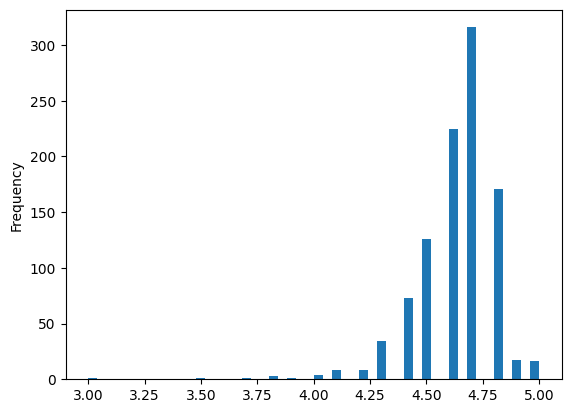

In [ ]:
df['Рейтинг товара'].plot.hist(bins=50)

Вывод 2

С увеличением оценки товара наблюдается рост в цене этого товара. Однако, это правило действует не на всем диапазоне цены. Подавляющее большинство товаров с оценкой от 4.6 до 4.8 продаются в диапазоне от 500р. до 5000р.

Товары по сравнительно высокой цене (тут они кажутся выбросами) не имеют одинаково высокий рейтинг (те самые продавцы, которые продают некачественное изделие за неоправданно большие деньги...).

<Axes: xlabel='Цена со скидкой', ylabel='Рейтинг товара'>

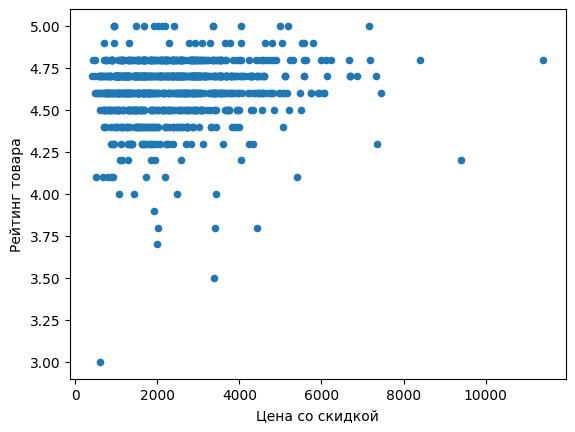

In [ ]:
df.plot.scatter(x='Цена со скидкой', y='Рейтинг товара')

Вывод 3

В собранной мной выборке больше всего товаров из группы кроссовки, второе место по численности - кеды, третье - слипоны. Такой вывод можно было также получить при помощи **df["Группа"].value_counts()**.

<Axes: xlabel='Группа', ylabel='count'>

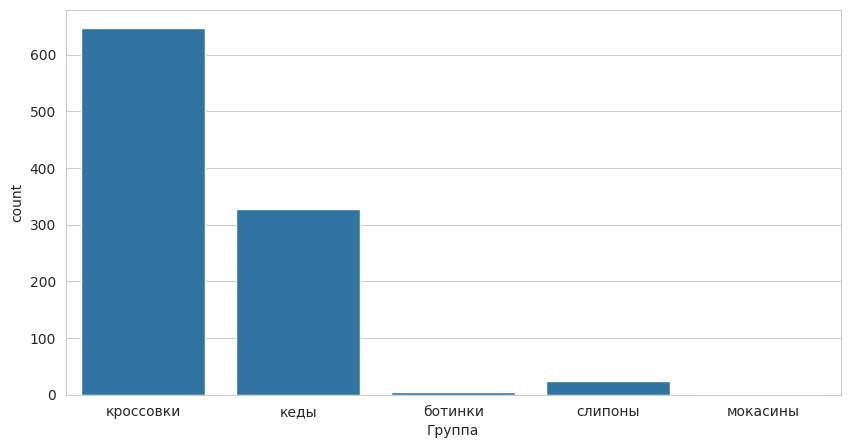

In [ ]:
sns.countplot(x = 'Группа', data = df)

In [ ]:
df["Группа"].value_counts()

,count
Группа,
кроссовки,647
кеды,327
слипоны,25
ботинки,5
мокасины,1


**Обработка отсутствующих значений**

Отсутствующих значений нет - удача.

In [ ]:
df.isna().value_counts()
df.info()
# df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Товар               1005 non-null   object 
 1   Группа              1005 non-null   object 
 2   Бренд товара        1005 non-null   object 
 3   Цена со скидкой     1005 non-null   int64  
 4   Цена без скидки     1005 non-null   int64  
 5   Количество отзывов  1005 non-null   int64  
 6   Рейтинг товара      1005 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 55.1+ KB


**Обработка выбросов**

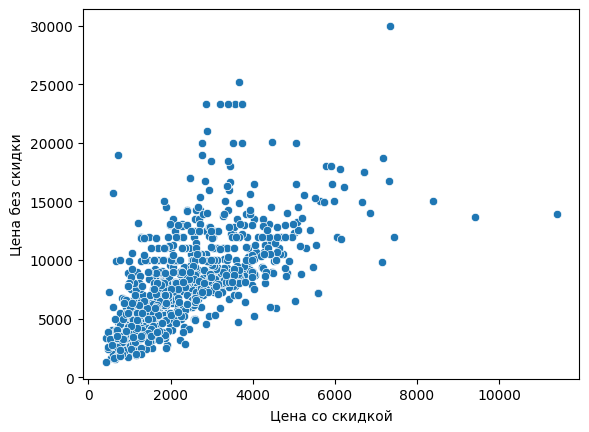

In [ ]:
sns.scatterplot(x = df['Цена со скидкой'], y = df['Цена без скидки']);

In [ ]:
df[['Цена со скидкой', 'Цена без скидки']].corr()

,Цена со скидкой,Цена без скидки
Цена со скидкой,1.000000,0.651794
Цена без скидки,0.651794,1.000000


Выбросы можно обработать при помощи **логарифмической или другой нелинейной трансформации**:

In [56]:
df['Цена со скидкой'] = df['Цена со скидкой'].apply(lambda x: np.log1p(x) if x > 0 else x)
df

,Товар,Группа,Бренд товара,Цена со скидкой,Цена без скидки,Количество отзывов,Рейтинг товара
0,Кроссовки на платформе демисезонные,кроссовки,JOYCITY,7.430114,5000,6044,4.6
1,Кеды осень белые мягкие кожаные дышащие облегч...,кеды,RENZONI,7.192182,5980,24352,4.7
2,Кеды демисезонные,кеды,Crosby,7.436028,5399,84,4.8
3,Кроссовки samba кеды самба,кеды,adidas,7.430114,5000,141,4.4
4,Кроссовки белые спортивные,кроссовки,Crosby,7.723562,4999,1448,4.8
...,...,...,...,...,...,...,...
1000,Кеды,кеды,BALDI,6.862758,7800,11,5.0
1001,Кроссовки,кроссовки,BALDI,6.862758,7800,15,4.9
1002,Кроссовки,кроссовки,BALDI,6.767343,6300,18,4.5
1003,Кроссовки женские на высокой подошве,кроссовки,KRAUS Collection,8.002025,8510,1583,4.7


Также выбросы можно обработать при помощи **Метода межквартильного размаха (IQR)**: статистический метод, который используется для определения выбросов. Значения за пределами диапазона [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] считаются выбросами. Если данные содержат множество выбросов, можно использовать более жесткое ограничение, например, [Q1 - 3 * IQR, Q3 + 3 * IQR]

In [57]:
Q1 = df['Цена со скидкой'].quantile(0.25)
Q1_1 = df['Цена без скидки'].quantile(0.25)
Q3 = df['Цена со скидкой'].quantile(0.75)
Q3_1 = df['Цена без скидки'].quantile(0.75)
IQR = Q3 - Q1
IQR_1 = Q3_1 - Q1_1
lower_bound = Q1 - 1.5 * IQR
lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound = Q3 + 1.5 * IQR
upper_bound_1 = Q3_1 + 1.5 * IQR_1

df = df[(df['Цена со скидкой'] >= lower_bound) & (df['Цена со скидкой'] <= upper_bound)]
df = df[(df['Цена без скидки'] >= lower_bound_1) & (df['Цена без скидки'] <= upper_bound_1)]
df

,Товар,Группа,Бренд товара,Цена со скидкой,Цена без скидки,Количество отзывов,Рейтинг товара
0,Кроссовки на платформе демисезонные,кроссовки,JOYCITY,7.430114,5000,6044,4.6
1,Кеды осень белые мягкие кожаные дышащие облегч...,кеды,RENZONI,7.192182,5980,24352,4.7
2,Кеды демисезонные,кеды,Crosby,7.436028,5399,84,4.8
3,Кроссовки samba кеды самба,кеды,adidas,7.430114,5000,141,4.4
4,Кроссовки белые спортивные,кроссовки,Crosby,7.723562,4999,1448,4.8
...,...,...,...,...,...,...,...
1000,Кеды,кеды,BALDI,6.862758,7800,11,5.0
1001,Кроссовки,кроссовки,BALDI,6.862758,7800,15,4.9
1002,Кроссовки,кроссовки,BALDI,6.767343,6300,18,4.5
1003,Кроссовки женские на высокой подошве,кроссовки,KRAUS Collection,8.002025,8510,1583,4.7


Ну вот, корелляция стала буть ближе к единице



In [ ]:
df[['Цена со скидкой', 'Цена без скидки']].corr()

,Цена со скидкой,Цена без скидки
Цена со скидкой,1.000000,0.679502
Цена без скидки,0.679502,1.000000


**Извлечем данные из текстовых данных**

Мы уже выяснили, что в признаке Группа у нас пять категорий товара. На основе этого можно извлечь данные следующим образом: пусть кроссовки буду иметь код товара 0, тогда кеды - 1, слипоны - 2, ботинки - 3 и мокасины - 4. Создадим новый признак "Код группы":

In [58]:
def group_code(value):
    if value == "кроссовки":
        return 0
    if value == "кеды":
        return 1
    elif value == "слипоны":
        return 2
    elif value == "ботинки":
        return 3
    elif value == "мокасины":
        return 4

df['Код группы'] = df['Группа'].map(group_code)
df.head(15)

,Товар,Группа,Бренд товара,Цена со скидкой,Цена без скидки,Количество отзывов,Рейтинг товара,Код группы
0,Кроссовки на платформе демисезонные,кроссовки,JOYCITY,7.430114,5000,6044,4.6,0
1,Кеды осень белые мягкие кожаные дышащие облегч...,кеды,RENZONI,7.192182,5980,24352,4.7,1
2,Кеды демисезонные,кеды,Crosby,7.436028,5399,84,4.8,1
3,Кроссовки samba кеды самба,кеды,adidas,7.430114,5000,141,4.4,1
4,Кроссовки белые спортивные,кроссовки,Crosby,7.723562,4999,1448,4.8,0
5,Кроссовки спортивные на платформе кеды,кеды,Feel appeal,7.555905,4990,260,4.6,1
6,Кеды женские осень белые мягкие кожаные дышащи...,кеды,RENZONI,7.045777,5990,4855,4.7,1
7,Кроссовки Puma Suede XL,кроссовки,AOKA,7.700748,5885,193,4.4,0
8,Кроссовки демисезонные на высокой платформе,кроссовки,Crosby,7.838738,7699,69,4.7,0
9,Кроссовки,кроссовки,CorpGrin,7.365813,7111,817,4.5,0


В процессе парсинга из первого признака (Товар) уже был извлечен признак - ключевое слово в названии товара, его группа. Я считаю, что на данном этапе данного извлеченного признака будет вполне достаточно. Оставим токенизацию на потом.

# Baseline модель

**Baseline модель** — это простая модель, которая служит отправной точкой для сравнения и улучшения. Она показывает, какие результаты можно ожидать без сложных настроек

Поставим цель для модели: нужно предсказать признак "Цена со скидкой". Следовательно, наша задача - построение регрессии.

In [59]:
df_baseline = df.drop(["Товар", "Группа", "Бренд товара"], axis = 1)
X = df_baseline.drop('Цена со скидкой', axis = 1)
y = df_baseline['Цена со скидкой']

model = LinearRegression()
y_pred = model.fit(X, y).predict(X)

Проведем оценку предикта при помощи MSE.

In [7]:
# параметр squared = True возвращает MSE
# параметр squared = False возвращает RMSE
def mse(y, y_pred, squared = True):
  mse = ((y - y_pred) ** 2).sum() / len(y)

  if squared == True:
    return mse
  else:
    return np.sqrt(mse)

mse(y, y_pred), mse(y, y_pred, squared = False)

(0.14512179543163564, 0.3809485469609192)

Сравним со sklearn.

In [ ]:
# squared = False дает RMSE
mean_squared_error(y, y_pred, squared = False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.3809485469609192

Так как у нас модель регрессии, рассмотрим также коэффициент детерминации как метрику.

In [ ]:
model.score(X, y)

0.4972728346221842

In [ ]:
r2_score(y, y_pred)

0.4972728346221842

# Модель линейной регрессии

Но для начала - EDA!

Видим, что наибольшую корелляцию с целевой переменной "Цена со скидкой" имеют признаки "Цена без скидки" и с большим отрывом "Количество отзывов".

In [ ]:
corr_matrix = df_baseline.corr().round(2)
corr_matrix

,Цена со скидкой,Цена без скидки,Количество отзывов,Рейтинг товара,Код группы
Цена со скидкой,1.00,0.68,-0.18,0.14,-0.17
Цена без скидки,0.68,1.00,-0.17,-0.02,-0.12
Количество отзывов,-0.18,-0.17,1.00,0.07,0.00
Рейтинг товара,0.14,-0.02,0.07,1.00,-0.03
Код группы,-0.17,-0.12,0.00,-0.03,1.00


Text(0.5, 1.0, 'Цены на товары из категории женские кеды и кроссовки')

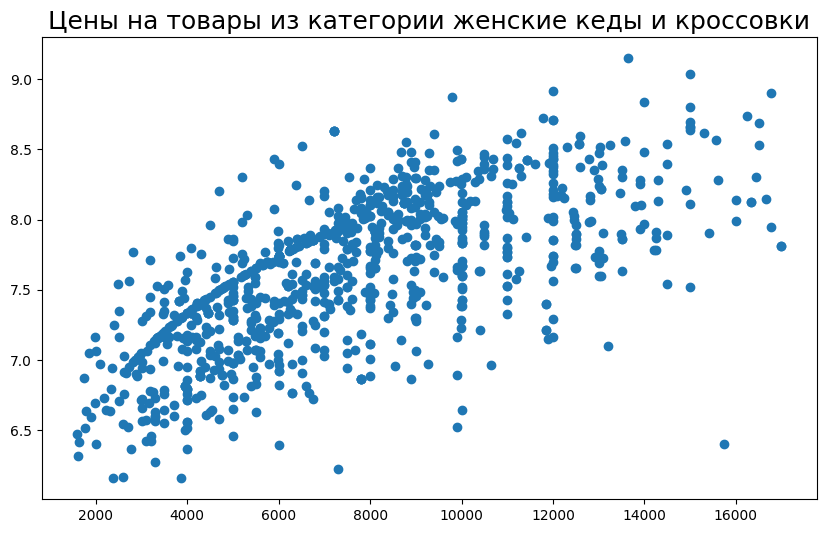

In [ ]:
x1 = df_baseline['Цена без скидки']
x2 = df_baseline['Количество отзывов']
y = df_baseline['Цена со скидкой']

plt.figure(figsize = (10,6))
plt.scatter(x1, y)

# добавим подписи
#plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
#plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Цены на товары из категории женские кеды и кроссовки', fontsize = 18)

**Train-test split**

In [16]:
"""X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.67,
                                                    random_state=42)
X_train"""

,Цена без скидки,Количество отзывов,Рейтинг товара,Код группы
129,5746,257,4.8,0
388,3000,977,4.6,0
402,8399,199,4.9,0
905,13990,1331,4.5,0
93,2900,2059,4.5,0
...,...,...,...,...
110,12500,739,4.6,0
276,5299,522,4.7,0
884,3862,7811,4.8,2
445,8400,220,4.8,1


In [48]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)

**Обучение, подбор гиперпараметров** при помощи grid search

In [26]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Пайплайн для масштабирования
ridge_grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Обучение моделей Ridge и Lasso
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Лучшая модель и гиперпараметры для Ridge
best_ridge_model = ridge_grid.best_estimator_
best_ridge_alpha = ridge_grid.best_params_

# Лучшая модель и гиперпараметры для Lasso
best_lasso_model = lasso_grid.best_estimator_
best_lasso_alpha = lasso_grid.best_params_

# Оценка лучших моделей на валидационной выборке
ridge_val_pred = best_ridge_model.predict(X_val)
lasso_val_pred = best_lasso_model.predict(X_val)

ridge_mse_val = mean_squared_error(y_val, ridge_val_pred)
lasso_mse_val = mean_squared_error(y_val, lasso_val_pred)

best_ridge_alpha, ridge_mse_val, best_lasso_alpha, lasso_mse_val

({'alpha': 0.1}, 0.12233142055437927, {'alpha': 0.1}, 0.12251906229954986)

Теперь **измерим качество модели** при помощи метрик $MSE$, $MAE$, $R^{2}$.

Заметим, что значение всех трех метрик уменьшается при измерении на валидационной выборке (относительно тренировочной выборки). Модель не переобучилась.

In [29]:
# Ridge model metrics
ridge_train_pred = best_ridge_model.predict(X_train)
ridge_val_pred = best_ridge_model.predict(X_val)

ridge_mse_train = mean_squared_error(y_train, ridge_train_pred)
ridge_mse_val = mean_squared_error(y_val, ridge_val_pred)
ridge_mae_train = mean_absolute_error(y_train, ridge_train_pred)
ridge_mae_val = mean_absolute_error(y_val, ridge_val_pred)
ridge_r2_train = r2_score(y_train, ridge_train_pred)
ridge_r2_val = r2_score(y_val, ridge_val_pred)

# Lasso model metrics
lasso_train_pred = best_lasso_model.predict(X_train)
lasso_val_pred = best_lasso_model.predict(X_val)

lasso_mse_train = mean_squared_error(y_train, lasso_train_pred)
lasso_mse_val = mean_squared_error(y_val, lasso_val_pred)
lasso_mae_train = mean_absolute_error(y_train, lasso_train_pred)
lasso_mae_val = mean_absolute_error(y_val, lasso_val_pred)
lasso_r2_train = r2_score(y_train, lasso_train_pred)
lasso_r2_val = r2_score(y_val, lasso_val_pred)

# Print results
print("Ridge Model:")
print(f"Train MSE: {ridge_mse_train}, Val MSE: {ridge_mse_val}")
print(f"Train MAE: {ridge_mae_train}, Val MAE: {ridge_mae_val}")
print(f"Train R2: {ridge_r2_train}, Val R2: {ridge_r2_val}")

print("\nLasso Model:")
print(f"Train MSE: {lasso_mse_train}, Val MSE: {lasso_mse_val}")
print(f"Train MAE: {lasso_mae_train}, Val MAE: {lasso_mae_val}")
print(f"Train R2: {lasso_r2_train}, Val R2: {lasso_r2_val}")

Ridge Model:
Train MSE: 0.15382643045950273, Val MSE: 0.12233142055437927
Train MAE: 0.31208728330055374, Val MAE: 0.2813657059723502
Train R2: 0.49143617735888523, Val R2: 0.50135135632835

Lasso Model:
Train MSE: 0.16418992323822282, Val MSE: 0.12251906229954986
Train MAE: 0.3214788815945582, Val MAE: 0.28729401889777584
Train R2: 0.45717355104872703, Val R2: 0.5005864890415854


Для линейных моделей обучения проходит за один шаг, поэтому для визуализации эпох подойдет **градиентный бустинг**.

Это оценка строит аддитивную модель поэтапно, что позволяет оптимизировать произвольные дифференцируемые функции потерь. На каждом этапе дерево регрессии подбирается по отрицательному градиенту данной функции потерь.

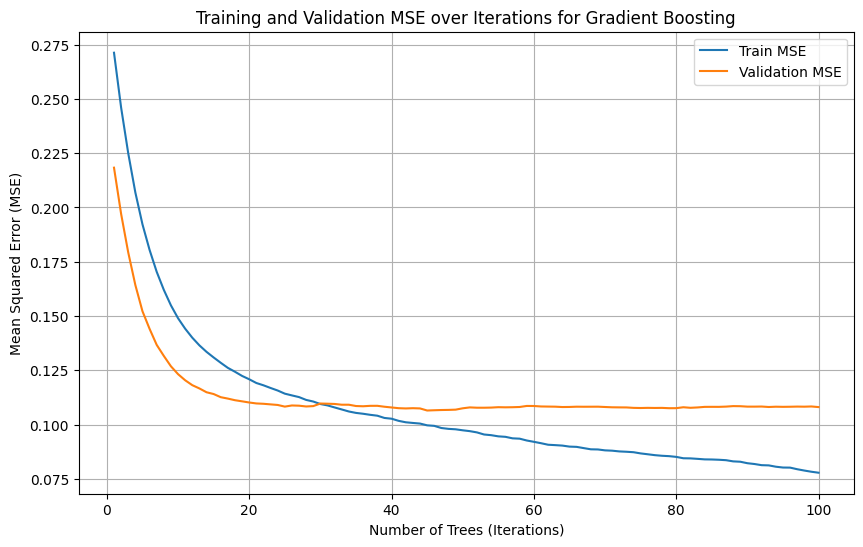

In [31]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

# Списки для хранения ошибок на каждой итерации
train_errors = []
val_errors = []

# Используем staged_predict для получения предсказаний на каждой итерации
for y_train_pred, y_val_pred in zip(gbr.staged_predict(X_train), gbr.staged_predict(X_val)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Построение графиков MSE на каждой итерации
plt.figure(figsize=(10, 6))
plt.plot(np.arange(100) + 1, train_errors, label="Train MSE")
plt.plot(np.arange(100) + 1, val_errors, label="Validation MSE")
plt.xlabel("Number of Trees (Iterations)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation MSE over Iterations for Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

# Самостоятельная реализация модели

Реализуем линейную регрессию с градиентным спуском и L2-регуляризацией, создадим сетку гиперпараметров и будем перебирать их, чтобы найти наилучшие.

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iterations=1000, l2_penalty=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.l2_penalty = l2_penalty
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Инициализация весов нулями
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Вычисляем градиенты с учетом L2-регуляризации
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.l2_penalty * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновляем веса
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Возможно, добавьте проверку на изменение потерь здесь для досрочной остановки

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Масштабирование данных
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Перебор гиперпараметров
learning_rates = [0.01, 0.001, 0.0001]  # Широкий диапазон для learning_rate
n_iterations = [1000, 2000]  # Увеличение числа итераций
l2_penalties = [0.0, 0.01, 0.1]

best_mse_val = float("inf")
best_params = None
best_model = None

for lr in learning_rates:
    for n_iter in n_iterations:
        for l2 in l2_penalties:
            model = LinearRegressionGD(learning_rate=lr, n_iterations=n_iter, l2_penalty=l2)
            model.fit(X_train, y_train)

            # Предсказания на тренировочной выборке
            y_pred_train = model.predict(X_train)
            mse_train = mean_squared_error(y_train, y_pred_train)

            # Предсказания на валидационной выборке
            y_pred_val = model.predict(X_val)
            mse_val = mean_squared_error(y_val, y_pred_val)

            # Сравнение MSE на валидационной выборке
            if mse_val < best_mse_val:
                best_mse_val = mse_val
                best_params = (lr, n_iter, l2)
                best_model = model

# Предсказания на тренировочной выборке с лучшей моделью
y_pred_train_best = best_model.predict(X_train)
mse_train_best = mean_squared_error(y_train, y_pred_train_best)

# Предсказания на тестовой выборке с лучшей моделью
y_pred_test_best = best_model.predict(X_test)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)

# Вывод результатов
print(f"Лучшие параметры: learning_rate={best_params[0]}, n_iterations={best_params[1]}, l2_penalty={best_params[2]}")
print(f"Train MSE: {mse_train_best}, Val MSE: {best_mse_val}")
print(f"Тестовый MSE: {mse_test_best}")


Лучшие параметры: learning_rate=0.01, n_iterations=1000, l2_penalty=0.01
Train MSE: 0.5191330651304058, Val MSE: 0.43192727105549733
Тестовый MSE: 0.44483684165881804


# Сравнение моделей

Значения метрик близки у моделей из фреймворка и у собственной модели.